In [3]:
# Gerekli kütüphaneleri içeri aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook için ayarlar
%matplotlib inline
sns.set_style('darkgrid')

# Veri setinin yolunu belirt
file_path = '../data/raw/cic_ids_2017.csv'

# Veri setini bir Pandas DataFrame'e yükle
try:
    df = pd.read_csv(file_path)
    print("Veri seti başarıyla yüklendi.")
    print(f"Satır Sayısı: {df.shape[0]}, Sütun Sayısı: {df.shape[1]}")
except FileNotFoundError:
    print(f"HATA: Belirtilen yolda dosya bulunamadı: {file_path}")
    print("Lütfen dosya yolunu ve adını kontrol edin.")

Veri seti başarıyla yüklendi.
Satır Sayısı: 225745, Sütun Sayısı: 79


In [4]:
# 'df' değişkeninin var olup olmadığını kontrol et
if 'df' in locals():
    # Veri setinin ilk 5 satırını görüntüle
    print("Veri Setinin İlk 5 Satırı:")
    display(df.head())

    # Sütun isimlerindeki olası baştaki/sondaki boşlukları temizle
    df.columns = df.columns.str.strip()
    print("\nSütun isimleri başarıyla temizlendi.")
else:
    print("HATA: 'df' DataFrame'i oluşturulamadı. Lütfen önceki hücreyi kontrol edin.")

Veri Setinin İlk 5 Satırı:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



Sütun isimleri başarıyla temizlendi.


In [5]:
# 'df' değişkeninin var olup olmadığını kontrol et
if 'df' in locals():
    # Sütunların veri tipleri ve boş olmayan değer sayıları hakkında genel bilgi al
    print("Veri Seti Genel Bilgileri (info):")
    df.info(verbose=False) # verbose=False ile sütun listesini göstermeden özet bilgi verir

    # Her sütundaki eksik (null/NaN) değerlerin sayısını hesapla
    print("\nSütunlardaki Eksik Değer Sayıları:")
    missing_values = df.isnull().sum()
    
    # Sadece 0'dan fazla eksik değeri olan sütunları göster
    if missing_values.sum() == 0:
        print("Veri setinde hiç eksik değer bulunmuyor. Harika!")
    else:
        print(missing_values[missing_values > 0])
else:
    print("HATA: 'df' DataFrame'i oluşturulamadı. Lütfen ilk hücreyi kontrol edin.")

Veri Seti Genel Bilgileri (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Columns: 79 entries, Destination Port to Label
dtypes: float64(24), int64(54), object(1)
memory usage: 136.1+ MB

Sütunlardaki Eksik Değer Sayıları:
Flow Bytes/s    4
dtype: int64


Veri Setindeki Etiketlerin (Label) Dağılımı:
Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64


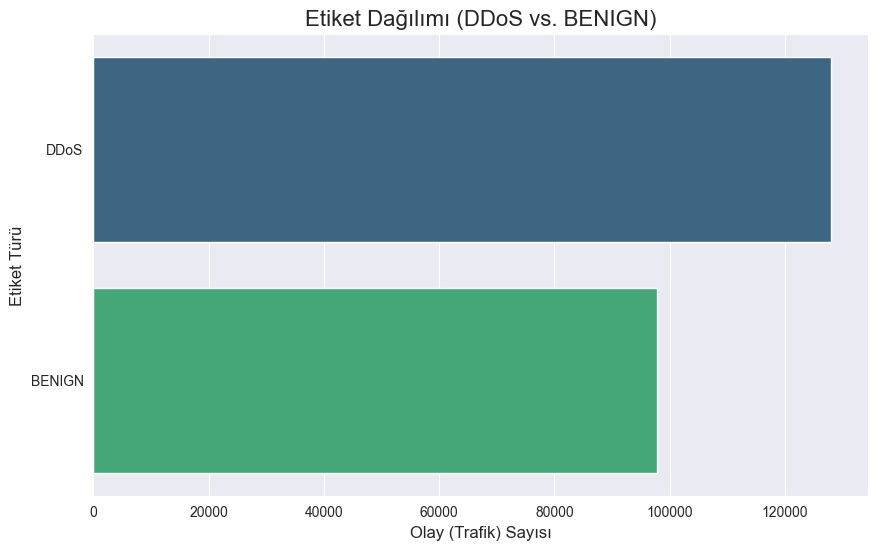

In [6]:
# 'df' değişkeninin var olup olmadığını ve 'Label' sütununun olup olmadığını kontrol et
if 'df' in locals() and 'Label' in df.columns:
    # 'Label' sütunundaki her bir özgün değerin sayısını bul
    label_counts = df['Label'].value_counts()

    # Sayım sonuçlarını ekrana yazdır
    print("Veri Setindeki Etiketlerin (Label) Dağılımı:")
    print(label_counts)

    # --- Görselleştirme ---
    plt.figure(figsize=(10, 6))
    
    # Seaborn ile yatay bir bar grafiği oluştur (FutureWarning uyarısını gideren güncel kod)
    sns.barplot(
        x=label_counts.values,
        y=label_counts.index,
        hue=label_counts.index,
        palette='viridis',
        legend=False
    )

    # Başlık ve eksen etiketleri ekle
    plt.title('Etiket Dağılımı (DDoS vs. BENIGN)', fontsize=16)
    plt.xlabel('Olay (Trafik) Sayısı', fontsize=12)
    plt.ylabel('Etiket Türü', fontsize=12)
    
    # Grafiği göster
    plt.show()

else:
    print("HATA: 'df' DataFrame'i veya 'Label' sütunu bulunamadı. Lütfen önceki hücreleri kontrol edin.")
    

In [7]:
# 'df' değişkeninin var olup olmadığını kontrol et
if 'df' in locals():
    # Her sütun için benzersiz (unique) değer sayılarını hesapla
    unique_counts = df.nunique()

    # Sadece tek bir değere sahip olan sütunları bul (bunlar model için anlamsızdır)
    constant_columns = unique_counts[unique_counts == 1].index.tolist()
    if constant_columns:
        print("Aşağıdaki sütunlar sadece tek bir değer içeriyor ve atılabilir:")
        print(constant_columns)
    else:
        print("Tek değerli (anlamsız) bir sütun bulunamadı.")

    # Çok yüksek sayıda benzersiz değere sahip sütunları da inceleyelim
    print("\nEn çok benzersiz değere sahip 10 sütun (potansiyel ID'ler veya gürültü):")
    print(unique_counts.sort_values(ascending=False).head(10))
else:
    print("HATA: 'df' DataFrame'i bulunamadı. Lütfen önceki hücreleri kontrol edin.")

Aşağıdaki sütunlar sadece tek bir değer içeriyor ve atılabilir:
['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

En çok benzersiz değere sahip 10 sütun (potansiyel ID'ler veya gürültü):
Flow Bytes/s      202293
Flow Packets/s    194094
Flow IAT Mean     193666
Fwd Packets/s     192230
Flow Duration     187752
Flow IAT Std      159622
Bwd Packets/s     144444
Flow IAT Max      139745
Bwd IAT Mean      117311
Bwd IAT Std       113859
dtype: int64


In [8]:
if 'df' in locals():
    # Sayısal veri tiplerini seç (int64, float64)
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Kategorik veri tiplerini seç (object)
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # 'Label' sütunu bizim hedefimiz olduğu için özellik listesinden çıkaralım
    if 'Label' in categorical_cols:
        categorical_cols.remove('Label')

    print(f"Toplam {len(numerical_cols)} adet sayısal sütun bulundu.")
    # print(numerical_cols) # Liste çok uzunsa bu satırı yorumda bırak

    print(f"\nToplam {len(categorical_cols)} adet kategorik özellik sütunu bulundu.")
    if categorical_cols:
        print(categorical_cols)
    else:
        print("Kategorik özellik sütunu bulunamadı.")
else:
    print("HATA: 'df' DataFrame'i bulunamadı. Lütfen önceki hücreleri kontrol edin.")
    

Toplam 78 adet sayısal sütun bulundu.

Toplam 0 adet kategorik özellik sütunu bulundu.
Kategorik özellik sütunu bulunamadı.
